In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
educationdata1 = pd.read_csv("filepath")
educationdata2 = pd.read_csv("filepath")

In [84]:
educationdata1.head()

,ID,final_result,Female,Male,CGPA100,CGPA200,CGPA300
0,1,2,1,0,2,3,2
1,2,2,1,0,2,3,3
2,3,2,0,1,2,2,1
3,4,1,0,1,2,2,1
4,5,3,1,0,3,3,3


In [85]:
educationdata2.head()

,Unnamed: 0,final_result,CGPA300,CGPA200,CGPA100,Male,Female
0,0,2,1,2,3,1,0
1,1,2,3,2,1,1,0
2,2,3,2,3,2,1,0
3,3,3,2,3,2,0,1
4,4,3,3,2,3,1,0


In [86]:
educationdata1.info()
educationdata1.isnull().sum()
educationdata2.info()
educationdata2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029 entries, 0 to 3028
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            3029 non-null   int64
 1   final_result  3029 non-null   int64
 2   Female        3029 non-null   int64
 3   Male          3029 non-null   int64
 4   CGPA100       3029 non-null   int64
 5   CGPA200       3029 non-null   int64
 6   CGPA300       3029 non-null   int64
dtypes: int64(7)
memory usage: 165.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    10000 non-null  int64
 1   final_result  10000 non-null  int64
 2   CGPA300       10000 non-null  int64
 3   CGPA200       10000 non-null  int64
 4   CGPA100       10000 non-null  int64
 5   Male          10000 non-null  int64
 6   Female        10000 non-null  int64
dtypes: i

Unnamed: 0      0
final_result    0
CGPA300         0
CGPA200         0
CGPA100         0
Male            0
Female          0
dtype: int64

In [87]:
educationdata1.drop(educationdata1.columns[[-1, 0]], axis=1, inplace=True)
educationdata2.drop(educationdata2.columns[[-1, 0]], axis=1, inplace=True)

In [88]:
x1 = educationdata1.drop("final_result", axis = 1)
y1 = educationdata1.final_result
x2 = educationdata2.drop("final_result", axis = 1)
y2 = educationdata2.final_result
x_train = x1
y_train = y1
x_test = x2
y_test = y2

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [90]:
kNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
LR = LogisticRegression()

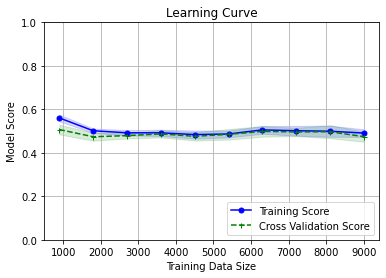

In [91]:
pipeline = make_pipeline(StandardScaler(), kNN)

train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X=x_test, y=y_test,
                                                       cv=10, train_sizes=np.linspace(0.1,1,10),
                                                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.grid()
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

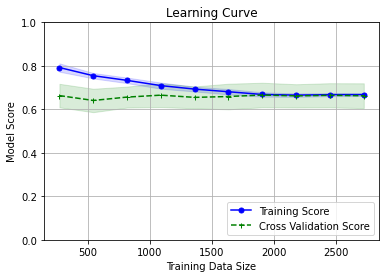

In [92]:
pipeline = make_pipeline(StandardScaler(), DT)

train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1,1,10),
                                                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.grid()
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

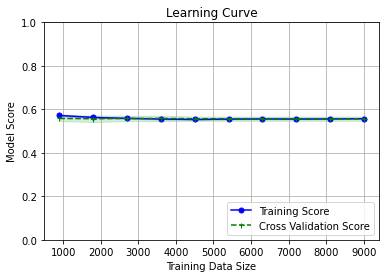

In [93]:
pipeline = make_pipeline(StandardScaler(), LR)

train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X=x_test, y=y_test,
                                                       cv=10, train_sizes=np.linspace(0.1,1,10),
                                                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.grid()
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [98]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [99]:
rf = KNeighborsClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

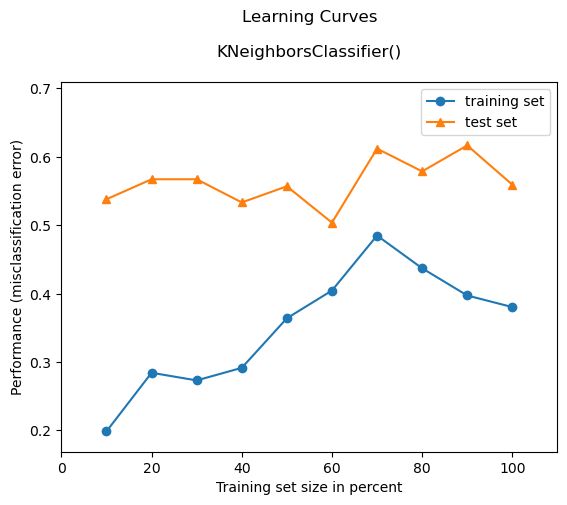

In [100]:
plot_learning_curves(x_train, y_train, x_test, y_test, rf)
plt.show()

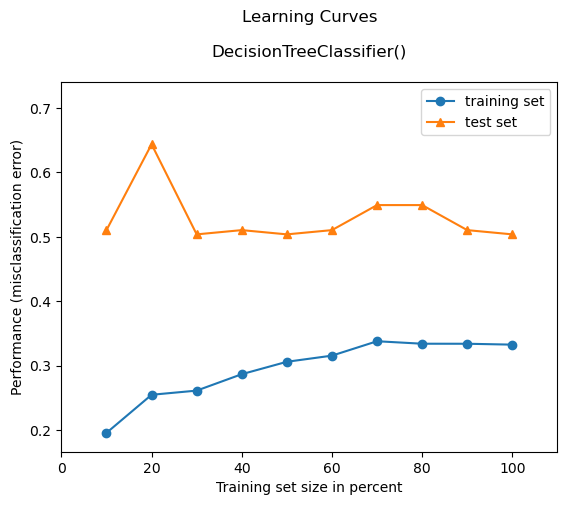

In [101]:
lf = DecisionTreeClassifier()
lf.fit(x_train, y_train)
lf_pred = lf.predict(x_test)
plot_learning_curves(x_train, y_train, x_test, y_test, lf)
plt.show()

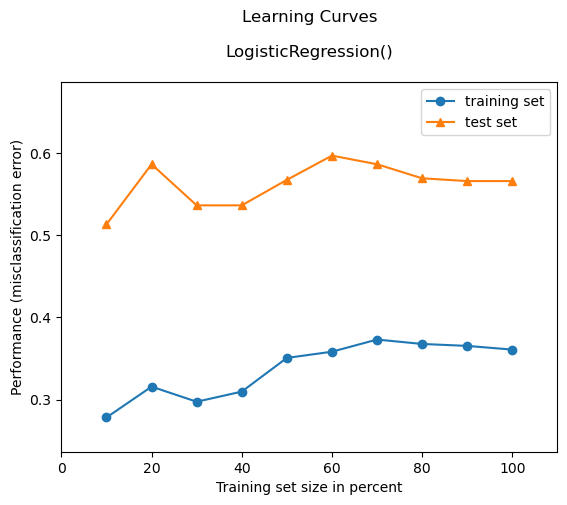

In [102]:
rf = LogisticRegression()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
plot_learning_curves(x_train, y_train, x_test, y_test, rf)
plt.show()

In [ ]:
kNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
LR = LogisticRegression()